In [1]:
import pandas as pd

df = pd.read_csv('data/BBox_List_2017.csv')
df.columns

Index(['Image Index', 'Finding Label', 'Bbox [x', 'y', 'w', 'h]', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [2]:
import openpyxl

df['x_max'] = df['Bbox [x'] + df['w']
df['y_max'] = df['y'] + df['h]']
df.head(5)
df.to_excel('BBox_List_2017.xlsx', index=False)

In [4]:
df_excel = pd.read_excel('BBox_List_2017.xlsx')

df_excel = df_excel.drop_duplicates(subset=['Image Index'], keep='first')
df_excel.to_excel('Bbox_880.xlsx')

In [19]:
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

def build_model(input_shape, num_classes):
    """ Inputs """
    inputs = L.Input(input_shape)

    """ Backbone """
    backbone = MobileNetV2(
        include_top=False,
        weights="imagenet",
        input_tensor=inputs,
        alpha=1.0
    )
    backbone.trainable = True
    for layer in backbone.layers[:100]:
        layer.trainable = False

    """ Detection Head """
    x = backbone.output
    x = L.Conv2D(256, kernel_size=3, padding="same")(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)
    x = L.Conv2D(128, kernel_size=3, padding="same")(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)
    x = L.GlobalAveragePooling2D()(x)
    x = L.Dropout(0.5)(x)

    bbox_output = L.Dense(4, activation="sigmoid", name="bbox")(x)
    class_output = L.Dense(num_classes, activation="softmax", name="class")(x)

    """ Model """
    model = Model(inputs, [bbox_output, class_output])
    return model

if __name__ == "__main__":
    input_shape = (224, 224, 3)
    num_classes = 8
    model = build_model(input_shape, num_classes)
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

/tmp/ipykernel_116934/3943657181.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  backbone = MobileNetV2(


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,505,484 (21.00 MB)

 Trainable params: 5,108,172 (19.49 MB)

 Non-trainable params: 397,312 (1.52 MB)

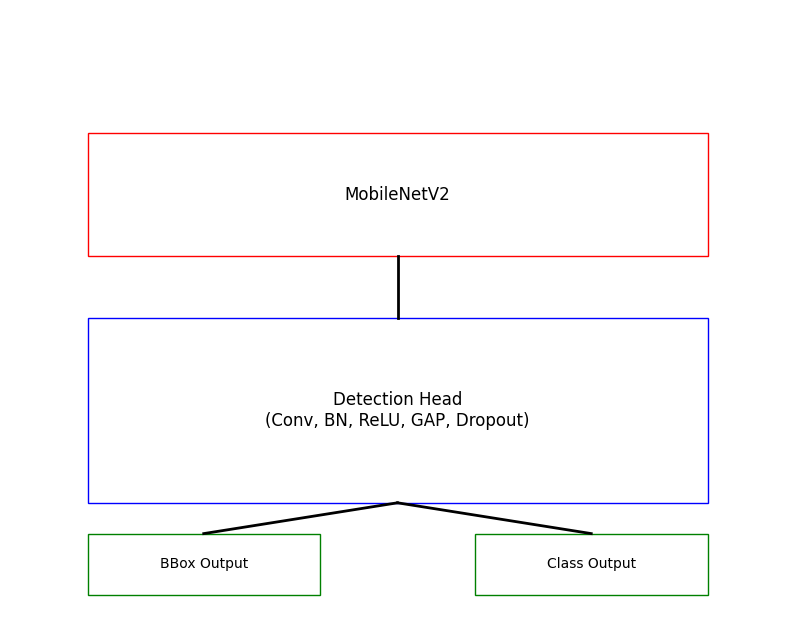

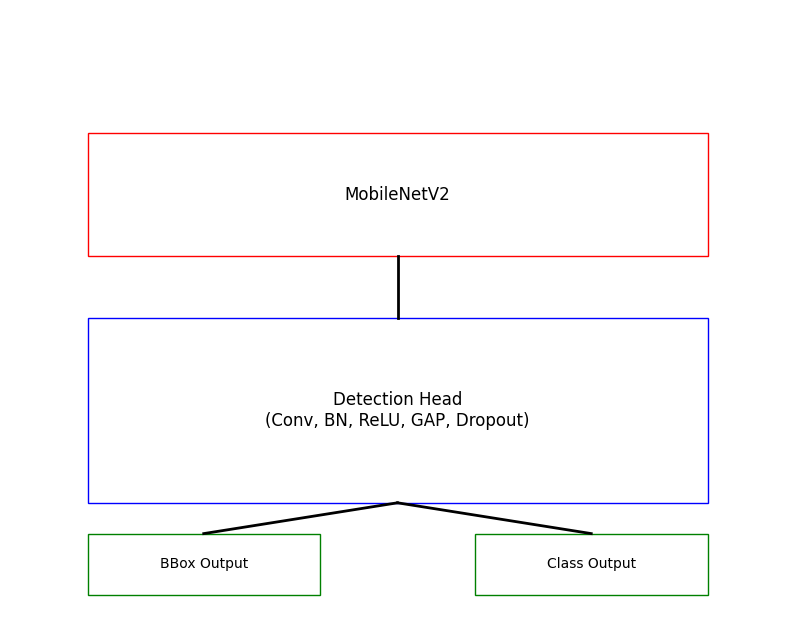

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_model_high_level():
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Backbone (MobileNetV2)
    backbone = patches.Rectangle((0.1, 0.6), 0.8, 0.2, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(backbone)
    plt.text(0.5, 0.7, 'MobileNetV2', horizontalalignment='center', verticalalignment='center', fontsize=12)
    
    # Detection Head
    detection_head = patches.Rectangle((0.1, 0.2), 0.8, 0.3, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(detection_head)
    plt.text(0.5, 0.35, 'Detection Head\n(Conv, BN, ReLU, GAP, Dropout)', horizontalalignment='center', verticalalignment='center', fontsize=12)
    
    # Outputs
    bbox_output = patches.Rectangle((0.1, 0.05), 0.3, 0.1, linewidth=1, edgecolor='g', facecolor='none')
    class_output = patches.Rectangle((0.6, 0.05), 0.3, 0.1, linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(bbox_output)
    ax.add_patch(class_output)
    plt.text(0.25, 0.1, 'BBox Output', horizontalalignment='center', verticalalignment='center', fontsize=10)
    plt.text(0.75, 0.1, 'Class Output', horizontalalignment='center', verticalalignment='center', fontsize=10)
    
    # Connecting lines
    plt.plot([0.5, 0.5], [0.6, 0.5], 'k-', lw=2)
    plt.plot([0.5, 0.25], [0.2, 0.15], 'k-', lw=2)
    plt.plot([0.5, 0.75], [0.2, 0.15], 'k-', lw=2)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    plt.show()

plot_model_high_level()
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_model_high_level():
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Backbone (MobileNetV2)
    backbone = patches.Rectangle((0.1, 0.6), 0.8, 0.2, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(backbone)
    plt.text(0.5, 0.7, 'MobileNetV2', horizontalalignment='center', verticalalignment='center', fontsize=12)
    
    # Detection Head
    detection_head = patches.Rectangle((0.1, 0.2), 0.8, 0.3, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(detection_head)
    plt.text(0.5, 0.35, 'Detection Head\n(Conv, BN, ReLU, GAP, Dropout)', horizontalalignment='center', verticalalignment='center', fontsize=12)
    
    # Outputs
    bbox_output = patches.Rectangle((0.1, 0.05), 0.3, 0.1, linewidth=1, edgecolor='g', facecolor='none')
    class_output = patches.Rectangle((0.6, 0.05), 0.3, 0.1, linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(bbox_output)
    ax.add_patch(class_output)
    plt.text(0.25, 0.1, 'BBox Output', horizontalalignment='center', verticalalignment='center', fontsize=10)
    plt.text(0.75, 0.1, 'Class Output', horizontalalignment='center', verticalalignment='center', fontsize=10)
    
    # Connecting lines
    plt.plot([0.5, 0.5], [0.6, 0.5], 'k-', lw=2)
    plt.plot([0.5, 0.25], [0.2, 0.15], 'k-', lw=2)
    plt.plot([0.5, 0.75], [0.2, 0.15], 'k-', lw=2)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    plt.show()

plot_model_high_level()

In [8]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from model1 import build_model

H = 224
W = 224
NUM_CLASSES = 8

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path, split=0.1):
    """ Extracting the images and bounding boxes from csv file. """
    images = []
    bboxes = []
    labels = []

    df = pd.read_excel('BBox_880.xlsx')
    
    label_mapping = {label: idx for idx, label in enumerate(df["Finding Label"].unique())}
    print("Label Mapping:", label_mapping)

    for index, row in df.iterrows():
        image_index = row["Image Index"]
        x1 = int(row["Bbox [x"])
        y1 = int(row["y"])
        x2 = int(row["x_max"])
        y2 = int(row["y_max"])
        label = row["Finding Label"]

        image = os.path.join(path, "data/images/bbox", image_index)

        if os.path.exists(image):
            bbox = [x1, y1, x2, y2]
            images.append(image)
            bboxes.append(bbox)
            labels.append(label_mapping[label])
    
    """ Split the dataset """
    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(bboxes, test_size=split_size, random_state=42)
    train_labels, valid_labels = train_test_split(labels, test_size=split_size, random_state=42)

    return (train_x, train_y, train_labels), (valid_x, valid_y, valid_labels), label_mapping


def read_image_bbox_label(path, bbox, label):
    """ Image """
    path = path.decode()
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    h, w, _ = image.shape
    image = cv2.resize(image, (W, H))
    image = (image - 127.5) / 127.5  ## Normalize to [-1, +1]
    image = image.astype(np.float32)

    """ Bounding box """
    x1, y1, x2, y2 = bbox

    norm_x1 = float(x1) / w
    norm_y1 = float(y1) / h
    norm_x2 = float(x2) / w
    norm_y2 = float(y2) / h
    norm_bbox = np.array([norm_x1, norm_y1, norm_x2, norm_y2], dtype=np.float32)

    """ Label """
    label = tf.cast(label, tf.int64)

    return image, norm_bbox, label

def parse(x, y, label):
    x, y, label = tf.numpy_function(read_image_bbox_label, [x, y, label], [tf.float32, tf.float32, tf.int64])
    x.set_shape([H, W, 3])
    y.set_shape([4])
    label.set_shape([])
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)
    return x, {"bbox": y, "class": label}

def tf_dataset(images, bboxes, labels, batch=8):
    ds = tf.data.Dataset.from_tensor_slices((images, bboxes, labels))
    ds = ds.map(parse).batch(batch).prefetch(10)
    return ds

if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("files")

    """ Hyperparameters """
    batch_size = 16
    lr = 1e-4
    num_epochs = 20
    model_path = os.path.join("files", "model.keras")
    final_model_path = os.path.join("files", "final_model.h5")  # Final model path with .h5 extension
    csv_path = os.path.join("files", "log.csv")

    """ Dataset """
    dataset_path = '.'
    (train_x, train_y, train_labels), (valid_x, valid_y, valid_labels), label_mapping = load_dataset(dataset_path, split=0.1)
    num_classes = len(label_mapping)
    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")

    train_ds = tf_dataset(train_x, train_y, train_labels, batch=batch_size)
    valid_ds = tf_dataset(valid_x, valid_y, valid_labels, batch=batch_size)

    """ Model """
    model = build_model((H, W, 3), num_classes)
    model.compile(
        loss={
            "bbox": "mse",
            "class": "sparse_categorical_crossentropy"
        },
        optimizer=Adam(lr),
        metrics={
            "bbox": ['mse'],
            "class": ['accuracy']
        }
    )

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        CSVLogger(csv_path, append=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=2)
    ]

    history = model.fit(
        train_ds,
        epochs=num_epochs,
        validation_data=valid_ds,
        callbacks=callbacks
    )

    model.save(final_model_path)

Label Mapping: {'Atelectasis': 0, 'Cardiomegaly': 1, 'Effusion': 2, 'Infiltrate': 3, 'Mass': 4, 'Nodule': 5, 'Pneumonia': 6, 'Pneumothorax': 7}
Train: 792 - 792
Valid: 88 - 88


/mnt/d/Tugas Rifqi/UI/Physics/Bangkit/Capstone/object_detection_full/model1.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  backbone = MobileNetV2(


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 984ms/step - bbox_mse: 0.0576 - class_accuracy: 0.1002 - loss: 2.6185
Epoch 1: val_loss improved from inf to 2.34504, saving model to files/model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - bbox_mse: 0.0576 - class_accuracy: 0.1006 - loss: 2.6173 - val_bbox_mse: 0.0474 - val_class_accuracy: 0.1932 - val_loss: 2.3450 - learning_rate: 1.0000e-04
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - bbox_mse: 0.0616 - class_accuracy: 0.4494 - loss: 1.6321
Epoch 2: val_loss did not improve from 2.34504
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - bbox_mse: 0.0616 - class_accuracy: 0.4499 - loss: 1.6311 - val_bbox_mse: 0.0456 - val_class_accuracy: 0.1705 - val_loss: 2.5390 - learning_rate: 1.0000e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - bbox_mse: 0.0619 - class_accuracy: 0.8018 - loss: 0.9297
Epoch 3: val_loss did not improve from 2.34504
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - bbox_mse: 0.0619 - class_accuracy: 0.8021 - loss: 0.9283

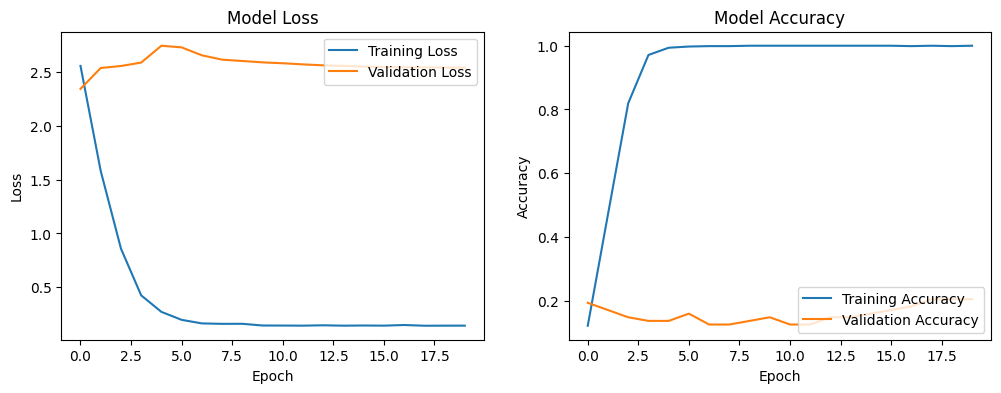

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['class_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_class_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()